# 使用线性回归预测波士顿房价

## 说明

线性回归，即学习一个线性方程来拟合特征X与结果Y。  
如根据房屋面积x1，房间数量x2，地理位置x3等来预测房屋的价格y。  
所以我们要学习一个方程:  
$y=w_1x_1+w_2x_2+w_3x_3 + b$  
这个方程就是线性回归的$模型函数$，就是最终我们用来预测y值的函数  
其中$w_1,w_2,w_3,b$ 就是我们要学习的参数。

如何学习$w_1,w_2,w_3,b$ 呢，我们要学到怎样的$w_1,w_2,w_3,b$才能证明这个模型ok呢？  
我们的目标是让预测值尽可能地接近真实值。设预测值为$y'$,真实值为y，我们当然是希望|y-$y'$|的值越小越好。  
所以我们引入一个代价函数，用来衡量整体的预测值与真实值的整体差距。代价函数如下:  
J(W,b) = $\frac{1}{2m}\sum_{i=1}^{m}{} (y'^{(i)}-y^{(i)})^2=\frac{1}{2m}\sum_{i=1}^{m}{} (W·X^{(i)}+b-y^{(i)})^2$

我们的目标就是要最小化J(W,b)。最小化J(W,b)的方法就是梯度下降法。

## 变量说明

对所用到的变量做一个统一说明，方便检查。  

将$y=w_1x_1+w_2x_2+w_3x_3 + b$  改写为:  
   $y=w_0x_0+w_1x_1+w_2x_2+w_3x_3$    
   
设:  
m: 样本个数  
n_x：特征维度  
θ：($w_0,w_1,w_2,w_3 ...)$  
则：  
X的shape 为:(m,n_x+1)  
y的shape为：(m,1)  
θ 的shape = (n_x+1,1)

## 实现

### Package

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sb

### 加载数据

In [8]:
pd_data = pd.read_csv("data/train.csv")
pd_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [15]:
y = np.array(pd_data["medv"]).reshape(-1,1)
X = np.array(pd_data.drop(columns=["medv"],axis=1))
print(X.shape)
print(y.shape)


(333, 14)
(333, 1)


In [16]:
#将数据分为训练集和测试集
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.1,random_state = 1)
print(f"train_X的大小为：{train_X.shape}")
print(f"tain_y的大小为：{train_y.shape}")
print(f"test_X的大小为：{test_X.shape}")
print(f"test_y的大小为：{test_y.shape}")

train_X的大小为：(299, 14)
tain_y的大小为：(299, 1)
test_X的大小为：(34, 14)
test_y的大小为：(34, 1)


In [17]:
#标准化
def nomalize(X,axis):
    mean = np.mean(X,axis)
    std = np.std(X,axis)
    print(mean.shape)
    return (X-mean)/std, mean,std

In [18]:
#将数据标准化
train_X,mean,std = nomalize(train_X,axis=0)
test_X = (test_X-mean)/std

#插入一列全为1的表示x0
train_X = np.insert(train_X,0,1,axis=1)
test_X = np.insert(test_X,0,1,axis=1)
print(train_X.shape)
print(test_X.shape)

(14,)
(299, 15)
(34, 15)


### 初始化参数

In [19]:
def init_parameters(n):
    theta = np.random.randn(n,1)
    return theta

### 定义损失函数

In [20]:
def compute_cost(y_,y):
    m = y.shape[0]
    cost = np.sum(np.square(y_-y))/(2*m)
    return cost

### 梯度下降

损失函数J(·)是一个凸函数。存在极小值。  
梯度下降所做的就是在损失函数上沿着导数方向下降，从而靠近极小值。  
所以实现梯度下降的步骤为:  
1.对θ求偏导:  
    $d_θ = \frac{d_{J(θ)}}{d_θ} = \frac{1}{m}X·(X·θ-y)$  
2.根据$d_θ$更新θ的值:   
$θ = θ-αd_θ$  
α为学习速率，人为指定。

In [21]:
def gradient_desent(X,y,theta,learning_rate):
    m = y.shape[0]
    y_ = np.dot(X,theta)
    d_theta = np.dot(X.T,y_-y)/m
    theta = theta - learning_rate*d_theta
    return theta

### 预测
使用模型函数进行预测

In [22]:
def predict(X,theta):
    return  np.dot(X,theta)

### 优化

In [23]:
def optimizer(train_X,train_y,theta,learning_rate,steps):
    costs = []
    for step in range(steps):
        theta = gradient_desent(train_X,train_y,theta,learning_rate)
        y_ = predict(train_X,theta)
        loss = compute_cost(y_,train_y)
        costs.append(loss)
        if step % 100 == 0:
            print(f"\nAfter {step} step(s),cost is :{loss}")
    return theta,costs

### 计算正确率
给定一个误差范围，如果预测值与真实值之差在该范围内，则表示预测准确

In [24]:
def calc_accuracy(y_pred,y,error_ratio):   
    '''
    y_pred---预测值
    y -- 真实值
    error_ratio ---误差范围，相比于真实值的百分比，如0.1，0.05
    '''
    y = y.reshape(-1,1)
    m = y.shape[0]
    correct_num = np.sum(np.fabs(y_pred-y) < error_ratio*y)
    return correct_num/m
    

### 组合到一起，训练模型

In [33]:
def model(train_X,train_y,test_X,test_y,learning_rate=0.05,steps=1):
    m,n_x = train_X.shape
    print(learning_rate)
    #初始化参数
    theta = init_parameters(n_x)
    theta,costs = optimizer(train_X,train_y,theta,learning_rate,steps)
    
    error_ratio = 0.30 # 即误差不能超过30%
    print("==== 训练集验证 ====")
    y_pred = predict(train_X,theta)
    corr_ratio = calc_accuracy(y_pred,train_y,error_ratio)
    print(f"训练集的正确率为：{corr_ratio}")
    
    print("==== 验证集验证 ====")
    y_pred = predict(test_X,theta)
    corr_ratio = calc_accuracy(y_pred,test_y,error_ratio)
    print(f"验证集的正确率为：{corr_ratio}")
    cost = compute_cost(y_pred,test_y)
    print(f"验证集的损失为：{cost}")

    # 绘制损失函数
    plt.xlim(0,steps)
    plt.plot(costs)
    plt.xlabel("step(s)")
    plt.ylabel("costs")
    plt.show() 
    return theta

0.09

After 0 step(s),cost is :230.24825203983994

After 100 step(s),cost is :11.363534111692141

After 200 step(s),cost is :11.125603518430495

After 300 step(s),cost is :11.066212702075525

After 400 step(s),cost is :11.050186119615693

After 500 step(s),cost is :11.045796164808479

After 600 step(s),cost is :11.044589957258454

After 700 step(s),cost is :11.044258318698049
==== 训练集验证 ====
训练集的正确率为：0.8762541806020067
==== 验证集验证 ====
验证集的正确率为：0.8823529411764706
验证集的损失为：11.915018055535366


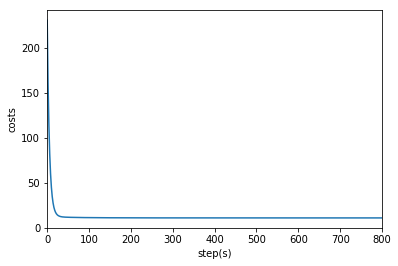

In [34]:
theta = model(train_X,train_y,test_X,test_y,learning_rate=0.09,steps=800)

In [57]:
#测试集
test_data = pd.read_csv("data/test.csv")
test_data.head()
X_test = np.array(test_data)
X_test = (X_test-mean)/std
X_test = np.insert(X_test,0,1,axis=1)
y_test = predict(X_test,theta)
ID = np.array(test_data["ID"]).reshape(-1,1)
result = np.hstack((ID,y_test))
result_pd = pd.DataFrame(result,columns=["ID","medv"])
result_pd["ID"] = result_pd["ID"].astype(int)
result_pd.to_csv("data/pred_result.csv",index=False)

## 总结

这里使用的是线性回归，线性增长。实际上更应该是增长到一定程度应该放缓。
所以更应该选用类似$\sqrt$z